In [25]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
DBNAME = "opportunity_youth"

In [27]:
conn = psycopg2.connect(dbname=DBNAME)

In [28]:
cursor = conn.cursor()
cursor.execute("""SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public'""")
tables = []
for table in cursor.fetchall():
    tables.append(table[0])
tables

['pums_2017',
 'puma_names_2010',
 'wa_jobs_2017',
 'wa_geo_xwalk',
 'ct_puma_xwalk']

In [16]:
pums_2017_df = pd.read_sql("SELECT * FROM pums_2017;", conn)
puma_names_2010_df = pd.read_sql("SELECT * FROM puma_names_2010;", conn)
wa_jobs_2017_df = pd.read_sql("SELECT * FROM wa_jobs_2017;", conn)
wa_geo_xwalk_df = pd.read_sql("SELECT * FROM wa_geo_xwalk;", conn)
ct_puma_xwalk_df = pd.read_sql("SELECT * FROM ct_puma_xwalk;", conn)

In [14]:
# wa_geo_xwalk_df = pd.read_sql("SELECT * FROM wa_geo_xwalk;", conn)
# wa_geo_xwalk_df

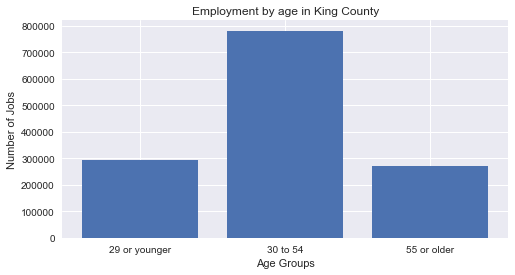

In [61]:
# w_geocode Char15 Workplace Census Block Code 

# C000 total number of jobs

# CA01 Num Number of jobs for workers age 29 or younger
# CA02 Num Number of jobs for workers age 30 to 54
# CA03 Num Number of jobs for workers age 55 or older

# CE01 Num Number of jobs with earnings $1250/month or less
# CE02 Num Number of jobs with earnings $1251/month to $3333/month
# CE03 Num Number of jobs with earnings greater than $3333/month 

# 29 CR01 Num Number of jobs for workers with Race: White
# 30 CR02 Num Number of jobs for workers with Race: Black or African American
# 31 CR03 Num Number of jobs for workers with Race: American Indian or Alaska Native
# 32 CR04 Num Number of jobs for workers with Race: Asian
# 33 CR05 Num Number of jobs for workers with Race: Native Hawaiian or Other Pacific Islander
# 34 CR07 Num Number of jobs for workers with Race: Two or More Race Groups
# 35 CT01 Num Number of jobs for workers with Ethnicity: Not Hispanic or Latino
# 36 CT02 Num Number of jobs for workers with Ethnicity: Hispanic or Latino

# CS01 Num Number of jobs for workers with Sex: Male17
# CS02 Num Number of jobs for workers with Sex: Female17

# CNS01 Num Number of jobs in NAICS sector 11 (Agriculture, Forestry, Fishing and Hunting)
# CNS02 Num Number of jobs in NAICS sector 21 (Mining, Quarrying, and Oil and Gas Extraction)
# CNS03 Num Number of jobs in NAICS sector 22 (Utilities)
# CNS04 Num Number of jobs in NAICS sector 23 (Construction)
# CNS05 Num Number of jobs in NAICS sector 31-33 (Manufacturing)
# CNS06 Num Number of jobs in NAICS sector 42 (Wholesale Trade)
# CNS07 Num Number of jobs in NAICS sector 44-45 (Retail Trade)
# CNS08 Num Number of jobs in NAICS sector 48-49 (Transportation and Warehousing)
# CNS09 Num Number of jobs in NAICS sector 51 (Information)
# CNS10 Num Number of jobs in NAICS sector 52 (Finance and Insurance)
# CNS11 Num Number of jobs in NAICS sector 53 (Real Estate and Rental and Leasing)
# CNS12 Num Number of jobs in NAICS sector 54 (Professional, Scientific, and Technical Services)
# CNS13 Num Number of jobs in NAICS sector 55 (Management of Companies and Enterprises)
# CNS14 Num Number of jobs in NAICS sector 56 (Administrative and Support and Waste Management and Remediation Services)
# CNS15 Num Number of jobs in NAICS sector 61 (Educational Services)
# CNS16 Num Number of jobs in NAICS sector 62 (Health Care and Social Assistance)
# CNS17 Num Number of jobs in NAICS sector 71 (Arts, Entertainment, and Recreation)
# CNS18 Num Number of jobs in NAICS sector 72 (Accommodation and Food Services)
# CNS19 Num Number of jobs in NAICS sector 81 (Other Services [except Public Administration])
# CNS20 Num Number of jobs in NAICS sector 92 (Public Administration) 

# Filter for geocode in South King County

wa_jobs_2017_df = pd.read_sql("""
SELECT w_geocode, C000, CA01, CA02, CA03, CE01, CE02, CE03, CR01, CR02, CR03, CR04, CR05, CT02, CR07, CS01, CS02
FROM wa_jobs_2017;
""", conn)

wa_jobs_2017_df.columns = ["geocode", "Total number of jobs", "29 or younger","30 to 54", "55 or older",
                           "1250/month or less", "$1251/month to $3333/month", "greater than $3333/month",
                           "White", "Black or African American", "American Indian or Alaska Native", "Asian", "Native Hawaiian or Other Pacific Islander", "Hispanic or Latino", "Two or More Race Groups",
                           "Male", "Female"]

wa_jobs_2017_by_age_df = wa_jobs_2017_df.filter(["geocode", "29 or younger","30 to 54", "55 or older"], axis=1)
wa_jobs_2017_by_income_df = wa_jobs_2017_df.filter(["1250/month or less", "$1251/month to $3333/month", "greater than $3333/month"], axis=1)
wa_jobs_2017_by_race_df = wa_jobs_2017_df.filter(["White", "Black or African American", "American Indian or Alaska Native", "Asian", "Native Hawaiian or Other Pacific Islander", "Hispanic or Latino", "Two or More Race Groups"], axis=1)
wa_jobs_2017_by_sex_df = wa_jobs_2017_df.filter(['Male', 'Female'], axis=1)

wa_jobs_2017_by_age_df["29 or younger"].sum()
wa_jobs_2017_df["Total number of jobs"].sum()

wa_jobs_2017_29_and_younger_df = wa_jobs_2017_df.filter(["geocode","Total number of jobs", "29 or younger"])
wa_jobs_2017_29_and_younger_in_king_df = wa_jobs_2017_29_and_younger_df[wa_jobs_2017_29_and_younger_df["geocode"].str.startswith('53033')]
wa_jobs_2017_29_and_younger_in_king_df

wa_jobs_2017_by_age_df = wa_jobs_2017_by_age_df[wa_jobs_2017_by_age_df["geocode"].str.startswith('53033')]
wa_jobs_2017_by_age_df = wa_jobs_2017_by_age_df.drop(["geocode"], axis =1)

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(wa_jobs_2017_by_age_df.columns, wa_jobs_2017_by_age_df.sum())
plt.title("Employment by age in King County")
plt.ylabel("Number of Jobs")
plt.xlabel("Age Groups")
plt.show()


In [29]:
puma_names_df = pd.read_sql("""
SELECT *
FROM puma_names_2010
WHERE puma_name LIKE 'King County%';
""", conn)
geoids_list = tuple(puma_names_df.geoid)
geoids_list

('5311606',
 '5311607',
 '5311608',
 '5311609',
 '5311610',
 '5311613',
 '5311614',
 '5311615',
 '5311616',
 '5311611',
 '5311612')

<h1>29 and younger workers in King County<h1>

In [44]:
# w_geocode Char15 Workplace Census Block Code 
# C000 total number of jobs
# CA01 Num Number of jobs for workers age 29 or younger

# Filter for geocode in King County
# Can't figure out how to find just SOUTH King County

wa_jobs_2017_29_and_younger_df = pd.read_sql("""
SELECT w_geocode, C000, CA01
FROM wa_jobs_2017;
""", conn)

wa_jobs_2017_29_and_younger_df.columns = ["geocode","Total number of jobs", "29 or younger"]
wa_jobs_2017_29_and_younger_df['percentage of 29 and younger'] = round(wa_jobs_2017_29_and_younger_df['29 or younger']/wa_jobs_2017_29_and_younger_df['Total number of jobs'], 4)*100 

wa_jobs_2017_29_and_younger_in_king_df = wa_jobs_2017_29_and_younger_df[wa_jobs_2017_29_and_younger_df["geocode"].str.startswith('53033')].reset_index()
wa_jobs_2017_29_and_younger_in_king_df

,index,geocode,Total number of jobs,29 or younger,percentage of 29 and younger
0,10691,530330001001002,2,1,50.00
1,10692,530330001001006,8,2,25.00
2,10693,530330001001013,13,1,7.69
3,10694,530330001001015,7,2,28.57
4,10695,530330001001018,2,0,0.00
...,...,...,...,...,...
14745,25436,530330328003421,6,2,33.33
14746,25437,530330328003423,1,0,0.00
14747,25438,530330328003424,7,4,57.14
14748,25439,530330328003434,5,1,20.00


In [ ]:
puma 
gdf = gdf[gdf['PUMA'] == puma]

In [9]:
#wa_geo_xwalk
# tabblk2010 Char15 2010 Census Tabulation Block Code
# st Char2 FIPS State Code
# stname Char100 State Name
# cty Char5 FIPS County Code
# ctyname Char100 County or County Equivalent Name
# trct Char11 Census Tract Code
# trctname Char100 Tract Name, formatted with County and State
# zcta Char5 ZIP Code Tabulation Area (ZCTA) Code
# zctaname Char100 ZCTA Name
# stplc Char7 Nationally Unique Place Code, (FIPS State + FIPS Place)
# stplcname Char100 Place Name
# ctycsub Char10 Nationally Unique County Subdivision Code, (FIPS State + FIPS County + FIPS County Subdivision)
# ctycsubname Char100 County Subdivision Name
# blklatdd Num Latitude (in decimal degrees) of block internal point.23
# blklondd Num Longitude (in decimal degrees) of block internal point. 23
# createdate Char8 Date on which data was created, formatted as YYYYMMDD 

wa_geo_xwalk_df = pd.read_sql("""
SELECT *
FROM wa_geo_xwalk
WHERE ctyname LIKE 'King County, WA%';
""", conn)
wa_geo_xwalk_df


,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,...,stanrcname,necta,nectname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
0,530330325001075,53,WA,Washington ...,53033,"King County, WA ...",53033032500,"325 (King, WA) ...",530330325001,"1 (Tract 325, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.690229,-121.715711,2019-08-26
1,530330328003235,53,WA,Washington ...,53033,"King County, WA ...",53033032800,"328 (King, WA) ...",530330328003,"3 (Tract 328, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.707243,-121.626151,2019-08-26
2,530330297003059,53,WA,Washington ...,53033,"King County, WA ...",53033029700,"297 (King, WA) ...",530330297003,"3 (Tract 297, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.369791,-122.241507,2019-08-26
3,530330270002001,53,WA,Washington ...,53033,"King County, WA ...",53033027000,"270 (King, WA) ...",530330270002,"2 (Tract 270, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.501092,-122.324844,2019-08-26
4,530339901000053,53,WA,Washington ...,53033,"King County, WA ...",53033990100,"9901 (King, WA) ...",530339901000,"0 (Tract 9901, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.483771,-122.378470,2019-08-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35826,530339901000079,53,WA,Washington ...,53033,"King County, WA ...",53033990100,"9901 (King, WA) ...",530339901000,"0 (Tract 9901, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.363858,-122.346140,2019-08-26
35827,530339901000019,53,WA,Washington ...,53033,"King County, WA ...",53033990100,"9901 (King, WA) ...",530339901000,"0 (Tract 9901, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.622133,-122.385803,2019-08-26
35828,530339901000062,53,WA,Washington ...,53033,"King County, WA ...",53033990100,"9901 (King, WA) ...",530339901000,"0 (Tract 9901, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.511522,-122.482877,2019-08-26
35829,530339901000034,53,WA,Washington ...,53033,"King County, WA ...",53033990100,"9901 (King, WA) ...",530339901000,"0 (Tract 9901, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.590672,-122.367992,2019-08-26


In [19]:
pd.read_sql("""SELECT * FROM puma_names_2010
WHERE state_name LIKE 'Washington%' AND puma_name LIKE 'King County%' AND puma_name LIKE '%South%';""", conn)



,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,53,Washington ...,1044,11606,5311606,G53011606,"King County (Northwest)--Shoreline, Kenmore & ..."
1,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
2,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
3,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
4,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."


In [9]:
#puma : area code id
#agep : age
#cow : class of working 9 .Unemployed and last worked 5 years ago or earlier or never
#wkl : When last worked
#sch : education

puma_names_2010_df = pd.read_sql("""
SELECT puma, agep, cow, wkl, sch, schl, rt
FROM pums_2017
WHERE (agep BETWEEN 16.0 AND 24.9)
AND rt = 'P'
AND CAST(sch AS int) = 1 OR sch IS null
AND CAST(cow AS int) = 9
""", conn)
puma_names_2010_df

,puma,agep,cow,wkl,sch,schl,rt
0,11801,17.0,1,1,1,16,P
1,10800,23.0,1,1,1,16,P
2,11802,22.0,5,1,1,16,P
3,10300,19.0,1,1,1,16,P
4,10703,24.0,1,1,1,16,P
...,...,...,...,...,...,...,...
15147,10702,21.0,None,3,1,17,P
15148,11705,23.0,4,2,1,17,P
15149,11603,22.0,None,3,1,12,P
15150,11701,21.0,1,1,1,14,P


In [11]:
df_filtered_joined = pd.read_sql("""
SELECT serialno, puma, agep, cow, wkl, sch, schl, rt, puma_name
FROM pums_2017
JOIN puma_names_2010
USING (puma)
WHERE (agep BETWEEN 16.0 AND 24.9)
AND rt = 'P'
AND CAST(sch AS int) = 1 OR sch IS null
AND CAST(cow AS int) = 9
AND state_name LIKE 'Washington%'
AND puma_name LIKE 'King County%'
""", conn)
df_filtered_joined = df_filtered_joined.drop_duplicates().reset_index(drop=True)
df_filtered_joined

,serialno,puma,agep,cow,wkl,sch,schl,rt,puma_name
0,2013000000181,11801,17.0,1,1,1,16,P,Kitsap County (North)--Bainbridge Island City ...
1,2013000000664,10800,23.0,1,1,1,16,P,Grant & Kittitas Counties ...
2,2013000001126,11802,22.0,5,1,1,16,P,Kitsap County (South)--Bremerton & Port Orchar...
3,2013000001584,10300,19.0,1,1,1,16,P,Chelan & Douglas Counties ...
4,2013000001874,10703,24.0,1,1,1,16,P,"Walla Walla, Benton (Outer) & Franklin (Outer)..."
...,...,...,...,...,...,...,...,...,...
21729,2017001535873,11801,20.0,5,1,1,16,P,Kitsap County (North)--Bainbridge Island City ...
21730,2017001536752,11801,22.0,5,1,1,16,P,Kitsap County (North)--Bainbridge Island City ...
21731,2017001534402,11603,22.0,None,3,1,12,P,Seattle City (Downtown)--Queen Anne & Magnolia...
21732,2017001536310,11701,21.0,1,1,1,14,P,"Snohomish County (Southwest)--Edmonds, Lynnwoo..."
